<a href="https://colab.research.google.com/github/brenoslivio/SME0828_DataScience/blob/master/Projects/3%20-%20Classifica%C3%A7%C3%A3o/Projeto3_Classificacao_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SME0828 - Introdução à Ciência de Dados
# Projeto 3: Classificação 

### Alunos

Aline Fernanda da Conceição, Nº USP: 9437275

Breno Lívio Silva de Almeida, Nº USP: 10276675

Matheus Victal Cerqueira, Nº USP: 10276661

***Universidade de São Paulo, São Carlos, Brasil.***

## Exercícios sugeridos para a atividade avaliativa 3

Os seguintes exercícios foram sugeridos para entrega em 03 de novembro de 2020 para a disciplina SME0828 - Ciência de Dados oferecida pelo Instituto de Ciências Matemáticas e de Computação (ICMC) da Universidade de São Paulo (USP), a qual foi ministrada pelo professor Francisco Aparecido Rodrigues. Vamos trabalhar com o conjunto de dados [*Star dataset to predict star types*](https://www.kaggle.com/deepu1109/star-dataset). O dataset tem várias informações sobre características de estrelas como temperatura absoluta, luminosidade relativa, tipos de estrelas, entre outros. Vamos classificar os dados considerando vários classificadores conhecidos.



---



## Sumário

1. Desenvolvimento

  1.1 [Exercício 1](#ex1)

  1.2 [Exercício 2](#ex2)

  1.3 [Exercício 3](#ex3)

  1.4 [Exercício 4](#ex4)

  1.5 [Exercício 5](#ex5)

  1.6 [Exercício 6](#ex6)



---



## Desenvolvimento



### <a name="ex1"></a> 1 - Considere a base de dados sobre doenças cardíacas:https://www.kaggle.com/ronitf/heart-disease-uci 
### Faça o pré-processamento dos dados e classifique os pacientes de acordo com a variável “target”.  Considere os classificadores: Bayesiano paramétrico, Bayesiano não-paramétrico e Naive Bayes.

#### Pré-processamento dos dados

Foi considerada a base de dados de estrelas [*Star dataset to predict star types*](https://www.kaggle.com/deepu1109/star-dataset) para o exercício. Vamos carregar seus dados.

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics

dataStar = pd.read_csv('https://raw.githubusercontent.com/brenoslivio/SME0828_DataScience/master/Projects/data/starsDataset.csv', 
        dtype={
          "Temperature (K)": np.int64,
          "Luminosity(L/Lo)": np.float64,
          "Radius(R/Ro)": np.float64,
          "Absolute magnitude(Mv)": np.float64,
          "Star type": str,
          "Star color": str,
          "Spectral Class": str
        },
        na_values="",)

dataStar.replace("", np.nan, inplace=True)

dataStar.dropna(inplace=True)

dataStar.sample(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
22,7220,0.00017,0.01100,14.23,2,White,F
90,5300,0.59000,0.91000,5.49,3,yellow-white,F
57,3450,174000.00000,1284.00000,-11.28,5,Red,M
50,3490,270000.00000,1520.00000,-9.40,5,Red,M
144,11900,0.00067,0.00898,11.38,2,Blue white,B


Temos três variáveis `Star type`, `Star color`, `Spectral Class` que podemos possivelmente indicar como labels para fazer a classificação, mas precisamos ter uma noção da frequência absoluta dos valores de cada variável.

In [2]:
dataStar['Star type'].value_counts()

1    40
0    40
4    40
2    40
3    40
5    40
Name: Star type, dtype: int64

In [3]:
dataStar['Star color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
yellowish               2
Orange                  2
Blue white              1
Blue                    1
Pale yellow orange      1
Blue-White              1
Yellowish               1
Orange-Red              1
White-Yellow            1
Name: Star color, dtype: int64

In [4]:
dataStar['Spectral Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

Com certeza devemos usar `Star type` como nosso label para classificação, por conta da distribuição igual de dados que foi apresentada, diferentemente das outras variáveis que contam com valores que aparecem somente uma vez. O dataset foi feito justamente para a classificação considerando os tipos de estrelas, mas é interessante ter uma análise para entender o porquê disso.

Dependendo da relação dessas variáveis que foram descartadas como possível label, podemos até usar usando a função do Pandas [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) para transformar facilmente em valores binários por coluna. Porém, para fácil visualização na tabela, será usado apenas uma coluna com essa ideia de ter valores inteiro usando a [biblioteca do sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) própria pra isso.

In [5]:
dataConcat = dataStar.copy()

# Método usando get_dummies para várias colunas

#Spectral = pd.get_dummies(dataConcat['Spectral Class'], drop_first=True)
#dataConcat.drop('Spectral Class',axis=1,inplace=True)
#dataConcat = pd.concat([dataConcat, Spectral],axis=1)

#Color = pd.get_dummies(dataConcat['Star color'], drop_first=True)
#dataConcat.drop('Star color',axis=1,inplace=True)
#dataConcat = pd.concat([dataConcat, Color],axis=1)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in list(dataConcat.columns):
    if dataConcat[i].dtype=='object':
        dataConcat[i]=le.fit_transform(dataConcat[i])

dataConcat.sample(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
127,2861,0.000190,0.0899,16.71,0,10,5
130,3095,0.000190,0.4920,10.87,1,10,5
230,24145,382993.000000,1494.0000,-8.84,5,6,1
114,3610,132000.000000,1522.0000,-10.86,5,10,5
188,2778,0.000849,0.1120,19.45,0,10,5


Vamos renomear as classes de estrelas para seus devidos nomes que não tem de padrão no conjunto de dados obtido.

In [6]:
# star class:  Star Type
#     0     :  Brown Dwarf
#     1     :  Red Dwarf
#     2     :  White Dwarf
#     3     :  Main-Sequence
#     4     :  Supergiant
#     5     :  Hypergiant

dataConcat["Star type"] = dataConcat["Star type"].replace(0, "Brown Dwarf")
dataConcat["Star type"] = dataConcat["Star type"].replace(1, "Red Dwarf")
dataConcat["Star type"] = dataConcat["Star type"].replace(2, "White Dwarf")
dataConcat["Star type"] = dataConcat["Star type"].replace(3, "Main-Sequence")
dataConcat["Star type"] = dataConcat["Star type"].replace(4, "Supergiant")
dataConcat["Star type"] = dataConcat["Star type"].replace(5, "Hypergiant")

dataConcat.sample(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
178,12100,120000.0000,708.9000,-7.84,Hypergiant,6,1
198,3324,0.0065,0.4710,12.78,Red Dwarf,10,5
138,3324,0.0034,0.3400,12.23,Red Dwarf,10,5
16,2799,0.0018,0.1600,14.79,Red Dwarf,10,5
1,3042,0.0005,0.1542,16.60,Brown Dwarf,10,5


Vamos pegar as classes nessa variável `Star type`.

In [7]:
# Nomes das classes
classes = np.array(pd.unique(dataConcat[dataConcat.columns[-3]]), dtype=str)  

# Atributos do dataset
attributes = list(dataConcat.columns)

classes

array(['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main-Sequence',
       'Supergiant', 'Hypergiant'], dtype='<U13')

Vamos converter o data frame para um array numpy com a intenção de manipular melhor com bibliotecas próprias para a classificação.

In [8]:
data = dataConcat.to_numpy()
data

array([[3068, 0.0024, 0.17, ..., 'Brown Dwarf', 10, 5],
       [3042, 0.0005, 0.1542, ..., 'Brown Dwarf', 10, 5],
       [2600, 0.0003, 0.102, ..., 'Brown Dwarf', 10, 5],
       ...,
       [8829, 537493.0, 1423.0, ..., 'Hypergiant', 11, 0],
       [9235, 404940.0, 1112.0, ..., 'Hypergiant', 11, 0],
       [37882, 294903.0, 1783.0, ..., 'Hypergiant', 0, 6]], dtype=object)

Para alguns casos, é interessante usar a ideia de [Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html) para escolhermos as variáveis que realmente nos ajude a obter uma melhor classificação. Entretanto vamos trabalhar com todos os valores visto que acurácia ainda se mantém alta mesmo sem esse método. Se a nossa classificação não lidasse com uma variável categórica, poderíamos até trabalhar com a ideia de observar as variáveis com a melhor [correlação com a variável target](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b) para a filtragem.

In [9]:
dataTrain = data
y = dataTrain[:, 4] # Pega o label que iremos classificar, o tipo de estrela
dataTrain = np.delete(dataTrain, 4, 1)
X = dataTrain # Pega os valores que sobraram para a classificação das estrelas

Vamos normalizar os dados para evitar o efeito da escala dos atributos envolvidos.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Por fim, separando os dados de forma que tenha o conjunto de dados para treino e o conjunto de dados para teste para poder testar se o treino foi efetivo. Ou seja, esses dados servem para ver se foi possível generalizar o suficiente considerando que eles não estavam no conjunto de dados para treino, sendo totalmente novos.

In [11]:
from sklearn.model_selection import train_test_split
p = 0.8 # Fração de elementos que iremos usar no treinamento
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

#### Classificador Bayesiano paramétrico

Vamos realizar propriamente a classificação que utiliza propriamente da ideia de encontrar a função densidade de probabilidade da [distribuição normal multivariada](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html) do conjunto X, os dados escolhidos para o treino.

In [12]:
from scipy.stats import multivariate_normal

# P irá guardar a probabilidade para as linhas e colunas
P = pd.DataFrame(data = np.zeros((x_test.shape[0], len(classes))), columns = classes) 

Pc = np.zeros(len(classes)) # A fração de elementos em cada classe
for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Pc[i] = len(elements)/len(y_train)
    Z = x_train[elements,:][0]
    m = np.mean(Z, axis = 0)
    cv = np.cov(np.transpose(Z)) # Matriz de covariância da distribuição
    for j in np.arange(0,x_test.shape[0]):
        x = x_test[j,:]
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        P[classes[i]][j] = pj*Pc[i]

Gerado o modelo podemos testar com a distribuição guardada para testes com o intuito de validar o modelo e verificar sua acurácia.

In [13]:
from sklearn.metrics import accuracy_score

y_pred = []

for i in np.arange(0, x_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]])) # Pega a classe/coluna com maior chance de ser
    y_pred.append(classes[c])

y_pred = np.array(y_pred, dtype=str)

score = accuracy_score(y_pred, y_test)
print('Acurácia da classificação Bayesiana paramétrica:', score)

Acurácia da classificação Bayesiana paramétrica: 0.9583333333333334


#### Classificador Bayesiano não-paramétrico

Com um estimador não-paramétrico, consideramos que não conhecemos a função de distribuição dos nossos dados, não conhecendo os parâmetros envolvidos. Praticamente vai envolver a criação e convolução de distribuições normais acerca de um conjunto dos nossos dados com a intenção de achar curvas que irão ajudar na classificação. Vamos usar do kernel de gaussiana da [biblioteca do sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html).

In [14]:
from sklearn.neighbors import KernelDensity

P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) 

h = 1 # Esse valor será melhor discutido no próximo exercício

for i in np.arange(0, len(classes)): 
    elements = tuple(np.where(y_train == classes[i])) 
    Pc[i] = len(elements)/len(y_train) 
    Z = x_train[elements,:][0] 
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,x_test.shape[0]): 
        x = x_test[j,:]
        x = x.reshape((1,len(x)))
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]

A variável `h` usada no código tem uma relevância importante com a possibilidade de formarmos curvas suscetíveis a ruídos, menos suave (overfitting), sendo valores mais baixos, e também curvas que podemos perder mais dados, mais suave (underfitting), sendo valores mais altos. Por isso devemos sempre focar em achar um valor razoável. Isso será melhor discutido no próximo exercício usando desse mesmo conjunto de dados.

Vamos, por fim, calcular a acurácia da forma que fizemos anteriormente.

In [15]:
from sklearn.metrics import accuracy_score

y_pred = [] 

for i in np.arange(0, x_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])

y_pred = np.array(y_pred, dtype=str)

score = accuracy_score(y_pred, y_test)

print('Acurácia da classificação Bayesiana não-paramétrica:', score)

Acurácia da classificação Bayesiana não-paramétrica: 0.9375


#### Classificador Naive Bayes

Esse tipo de classificador usa da teoria Bayesiana mas considerando a hipótese "naive" que os atributos trabalhados são independentes. Vamos usar da [implementação do próprio sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) que considera os dados já em uma distribuição normal (existem funções da biblioteca de Naive Bayes que lida com outras distribuições).

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
score = accuracy_score(y_pred, y_test)

print('Acurácia da classificação Naive Bayes:', score)

Acurácia da classificação Naive Bayes: 0.9583333333333334


É interessante notar que o classificador Naive Bayes funciona muito bem para aplicações do mundo real, mas parece [não funcionar tão bem como estimador](https://scikit-learn.org/stable/modules/naive_bayes.html), então sempre é interessante comparar com outros classificadores para escolhermos nossa opção dependendo do nosso conjunto de dados.

### <a name="ex2"></a> 2 - No classificar não-paramétrico, verifique o efeito do hiperparâmetro h na classificação dos dados de diabetes, encontrando seu melhor valor: https://www.kaggle.com/uciml/pima-indians-diabetes-database


In [17]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics

dataStar = pd.read_csv('https://raw.githubusercontent.com/brenoslivio/SME0828_DataScience/master/Projects/data/starsDataset.csv', 
        dtype={
          "Temperature (K)": np.int64,
          "Luminosity(L/Lo)": np.float64,
          "Radius(R/Ro)": np.float64,
          "Absolute magnitude(Mv)": np.float64,
          "Star type": str,
          "Star color": str,
          "Spectral Class": str
        },
        na_values="",)

dataStar.replace("", np.nan, inplace=True)

dataStar.dropna(inplace=True)

dataConcat = dataStar.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in list(dataConcat.columns):
    if dataConcat[i].dtype=='object':
        dataConcat[i]=le.fit_transform(dataConcat[i])

classes = np.array(pd.unique(dataConcat[dataConcat.columns[-3]]), dtype=str) 

data = dataConcat.to_numpy()

dataTrain = data
y = dataTrain[:, 4] # Pega o label que iremos classificar, o tipo de estrela
dataTrain = np.delete(dataTrain, 4, 1)
X = dataTrain # Pega os valores que sobraram para a classificação das estrelas

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

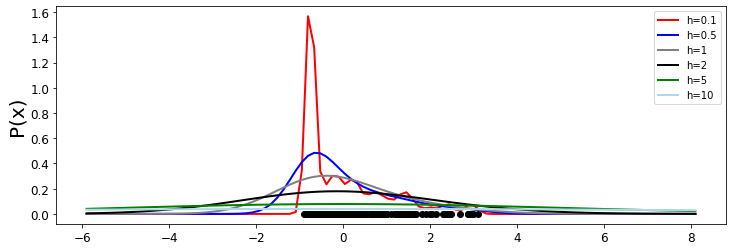

In [32]:
import numpy as np
from matplotlib.pyplot import cm

color=['red', 'blue', 'gray', 'black', 'green', 'lightblue']

X_Feat = X[:, 0]
X_Feat = X_Feat.reshape((len(X_Feat), 1))

X_plot = np.linspace(np.min(X_Feat) - 5, np.max(X_Feat) + 5, 100)[:, np.newaxis]

plt.figure(figsize=(12,4))
plt.plot(X_Feat, 0.001*np.ones(X_Feat.shape[0]), 'ok')

c = 0 

vh = [0.1, 0.5, 1, 2, 5, 10]

for h in vh:
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X_Feat)
    log_dens = np.exp(kde.score_samples(X_plot)) # score_samples() returns the log density.
    plt.plot(X_plot,log_dens, color = color[c], linewidth=2, label = 'h='+str(h))
    c = c + 1

plt.ylabel('P(x)', fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize = 10)
plt.show(True)